In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
import seaborn as sns
import pandas as pd
import os

# fit_out and intensities folders
fit_outs_folder = './data/fit_outs/'
intensities_folder = './data/Idts/'

## Load fit output from the 'fit_outs' directory

In [12]:
fit_out_files = os.listdir(fit_outs_folder)
# order the files in alphabetical order
fit_out_files.sort()
fit_out_files = fit_out_files[1:]
# load fit parameters
fit_outs = {}
for f in fit_out_files:
    fit_outs[f[8:-4]] = pd.read_csv(fit_outs_folder + f)


In [13]:
intensities_files = os.listdir(intensities_folder)
# order the files in alphabetical order
intensities_files.sort()
# load intensities
intensities = {}
for f in intensities_files:
    # load npz file here
    intensities[f[4:-4]] = np.load(intensities_folder + f)

## Define scan parameters

In [14]:
for i in fit_outs.keys():
    print('\''+i+'\': ,')

'GeO2_6_0001_0007': ,
'GeO2_6_0001_0008': ,
'GeO2_6_0001_0009': ,
'GeO2_6_0001_0011': ,
'GeO2_6_0001_0012': ,
'GeO2_6_100C_0001_0003': ,
'GeO2_6_170C_0001_0001': ,
'GeO2_6_240C_0001_0003': ,
'GeO2_6_310C_0001_0003': ,
'GeO2_6_380C_0001_0001': ,
'GeO2_6_450C_0001_0003': ,
'GeO2_6_520C_0001_0001': ,
'GeO2_6_590C_0001_0003': ,
'GeO2_6_590C_0002_0003': ,
'GeO2_6_660C_0001_0001': ,
'GeO2_6_660C_0002_0003': ,
'GeO2_6_730C_0001_0003': ,
'GeO2_6q_delcoup_1.75_0001_0001': ,
'GeO2_6q_delcoup_1_0001_0002': ,
'GeO2_6q_delcoup_5_0001_0002': ,
'GeO2_7_100C_0001_0003': ,
'GeO2_7_170C_0001_0003': ,
'GeO2_7_240C_0001_0003': ,
'GeO2_7_30C_0003_0003': ,
'GeO2_7_310C_0001_0003': ,
'GeO2_7_345C_0001_0003': ,


In [15]:
scan_d={
'GeO2_7_30C_0003_0003': 100,
'GeO2_7_100C_0001_0003': 100,
'GeO2_7_170C_0001_0003': 100,
'GeO2_7_240C_0001_0003': 100,
'GeO2_7_310C_0001_0003': 100,
'GeO2_7_345C_0001_0003': 100,
}

scan_T={
'GeO2_7_30C_0003_0003': 30,
'GeO2_7_100C_0001_0003': 100,
'GeO2_7_170C_0001_0003': 170,
'GeO2_7_240C_0001_0003': 240,
'GeO2_7_310C_0001_0003': 310,
'GeO2_7_345C_0001_0003': 345,
}

scan_E={
'GeO2_7_30C_0003_0003': 9.7,
'GeO2_7_100C_0001_0003': 9.7,
'GeO2_7_170C_0001_0003': 9.7,
'GeO2_7_240C_0001_0003': 9.7,
'GeO2_7_310C_0001_0003': 9.7,
'GeO2_7_345C_0001_0003': 9.7,
}

scan_Q={
'GeO2_7_30C_0003_0003': 0.19,
'GeO2_7_100C_0001_0003': 0.19,
'GeO2_7_170C_0001_0003': 0.19,
'GeO2_7_240C_0001_0003': 0.19,
'GeO2_7_310C_0001_0003': 0.19,
'GeO2_7_345C_0001_0003': 0.19,
}
    

## Dose rate definition

In [16]:
A = {8.67: np.pi*7*5, 21.67: np.pi*5.2*4.4, 15.875: np.pi*7.1*3.7}

# density of GeO2
rho = 3.7 * 10**(-4*3) * 10**(-3) # kg/um^3

# Photon flux
phi = {8.67: 2.1e12, 21.67: 8.3e11, 15.875: 9.3e11}

# attenuation length
la = {8.67: 68, 21.67: 113, 15.875: 'x'}

dose_rate= lambda E, d: phi[E]*(1-np.exp(-d/la[E]))*(E*1.6022e-16)/(rho*A[E]*d)



In [17]:
columns = ['Q','E', 't', 'tau', 'beta', 'c', 'y0', 'dtau', 'dbeta', 'dc', 'dy0']
df = pd.DataFrame(columns=columns)
for i in scan_E.keys():
    fit_outs[i]['T'] = scan_T[i]
    fit_outs[i]['d'] = scan_d[i]
    fit_outs[i]['E'] = scan_E[i]
    fit_outs[i]['Q'] = scan_Q[i]
    #fit_outs[i]['dose_rate'] = dose_rate(scan_E[i], scan_d[i])
    df = pd.concat([df,fit_outs[i]], ignore_index=True)
display(df)

/tmp/ipykernel_44635/1186650226.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,fit_outs[i]], ignore_index=True)


,Q,E,t,tau,beta,c,y0,dtau,dbeta,dc,dy0,T,d
0,0.19,9.7,49.5,6.189809,0.870163,0.027951,1.002385,0.174734,0.023682,0.000519,0.000044,30.0,100.0
1,0.19,9.7,93.5,5.717312,0.752720,0.026642,1.002424,0.226616,0.022426,0.000617,0.000030,100.0,100.0
2,0.19,9.7,93.5,5.136871,0.720972,0.027364,1.002419,0.170311,0.016829,0.000514,0.000023,170.0,100.0
3,0.19,9.7,93.5,4.774273,0.729842,0.026618,1.002431,0.198170,0.021599,0.000630,0.000027,240.0,100.0
4,0.19,9.7,93.5,3.913622,0.694329,0.026543,1.002357,0.206172,0.024081,0.000768,0.000029,310.0,100.0
5,0.19,9.7,192.5,3.495686,0.687399,0.026291,1.002379,0.136152,0.016964,0.000554,0.000013,345.0,100.0


## Fit parameters

### Params vs temperature & time

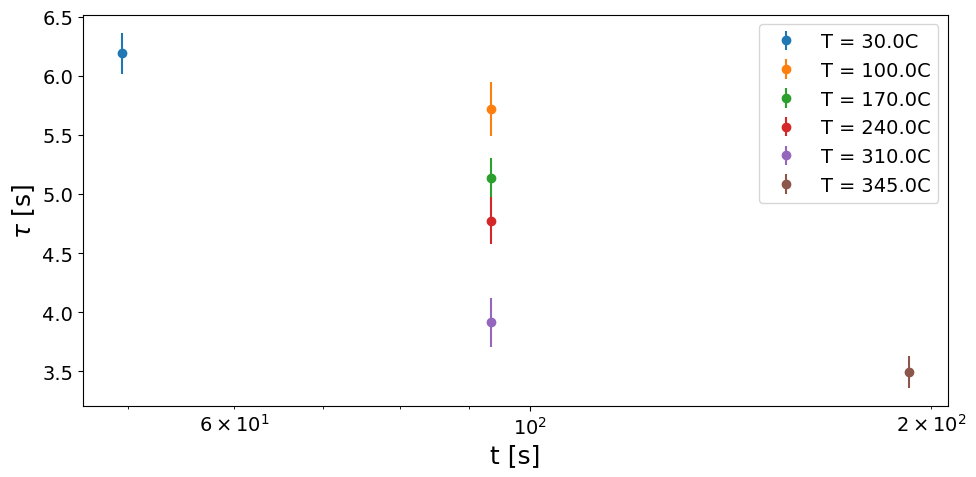

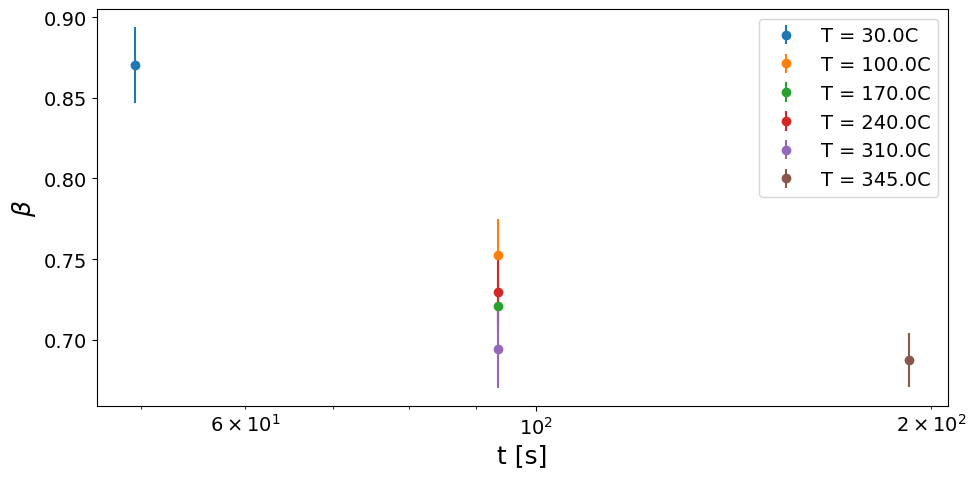

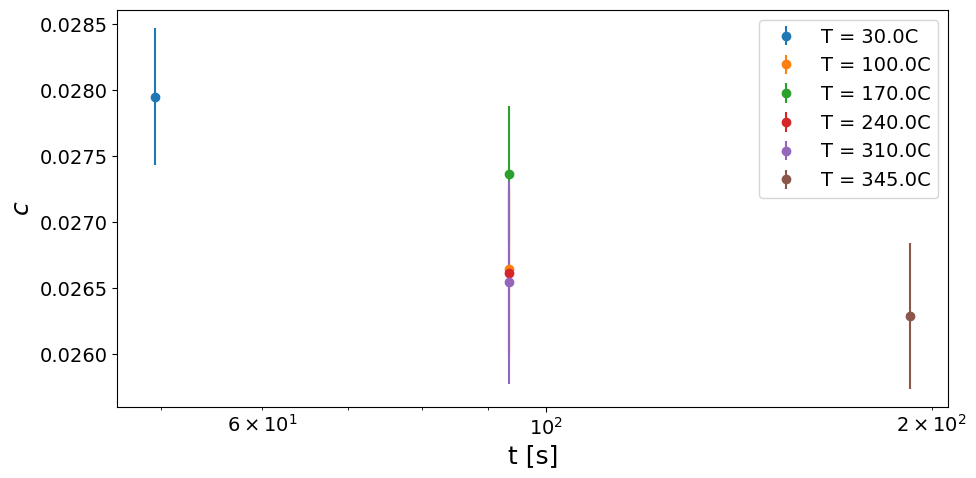

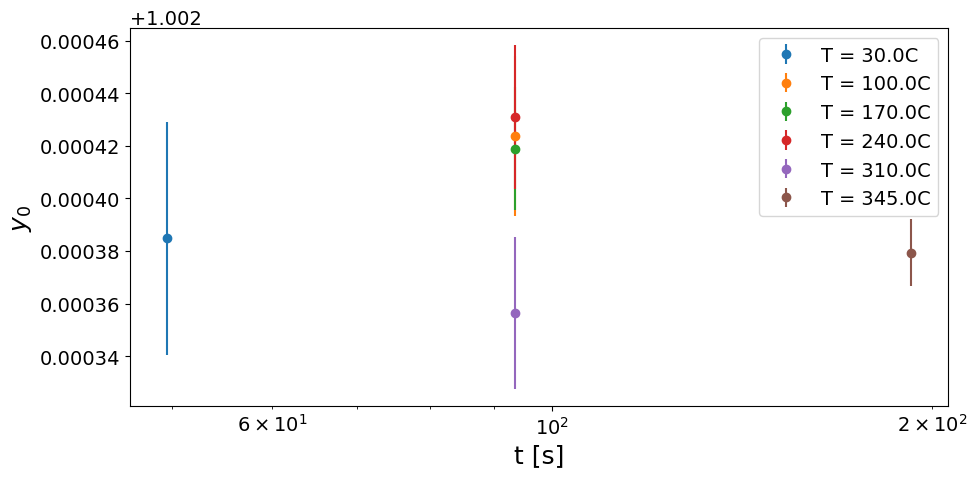

In [18]:
Ts = np.sort(df['T'].unique())

# tau
fig, ax = plt.subplots(figsize=(10, 5))
for T in Ts:
    df_temp = df[df['T'] == T]
    ax.errorbar(df_temp.t, df_temp.tau, yerr=df_temp.dtau, fmt='o', label='T = '+str(T)+'C')
plt.xscale('log')
plt.xlabel('t [s]')
plt.ylabel(r'$\tau$ [s]')
plt.legend()
plt.tight_layout(), plt.show();

# beta
fig, ax = plt.subplots(figsize=(10, 5))
for T in Ts:
    df_temp = df[df['T'] == T]
    ax.errorbar(df_temp.t, df_temp.beta, yerr=df_temp.dbeta, fmt='o', label='T = '+str(T)+'C')
plt.xscale('log')
plt.xlabel('t [s]')
plt.ylabel(r'$\beta$')
plt.legend()
plt.tight_layout(), plt.show();

# c
fig, ax = plt.subplots(figsize=(10, 5))
for T in Ts:
    df_temp = df[df['T'] == T]
    ax.errorbar(df_temp.t, df_temp.c, yerr=df_temp.dc, fmt='o', label='T = '+str(T)+'C')
plt.xscale('log')
plt.xlabel('t [s]')
plt.ylabel(r'$c$')
plt.legend()
plt.tight_layout(), plt.show();

# y0
fig, ax = plt.subplots(figsize=(10, 5))
for T in Ts:
    df_temp = df[df['T'] == T]
    ax.errorbar(df_temp.t, df_temp.y0, yerr=df_temp.dy0, fmt='o', label='T = '+str(T)+'C')
plt.xscale('log')
plt.xlabel('t [s]')
plt.ylabel(r'$y_0$')
plt.legend()
plt.tight_layout(), plt.show();

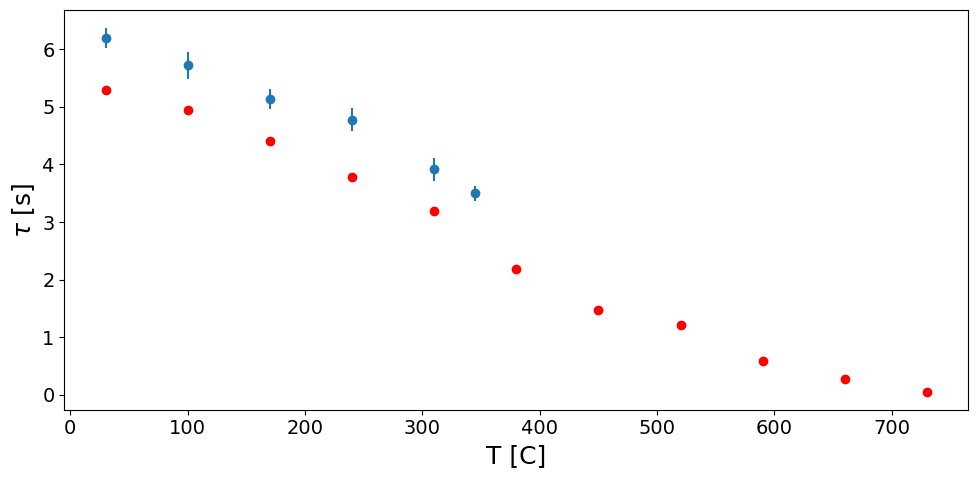

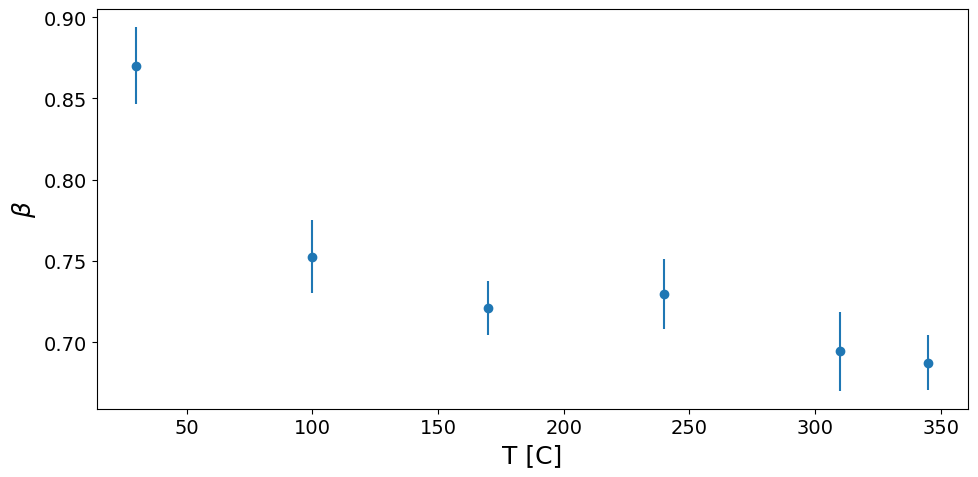

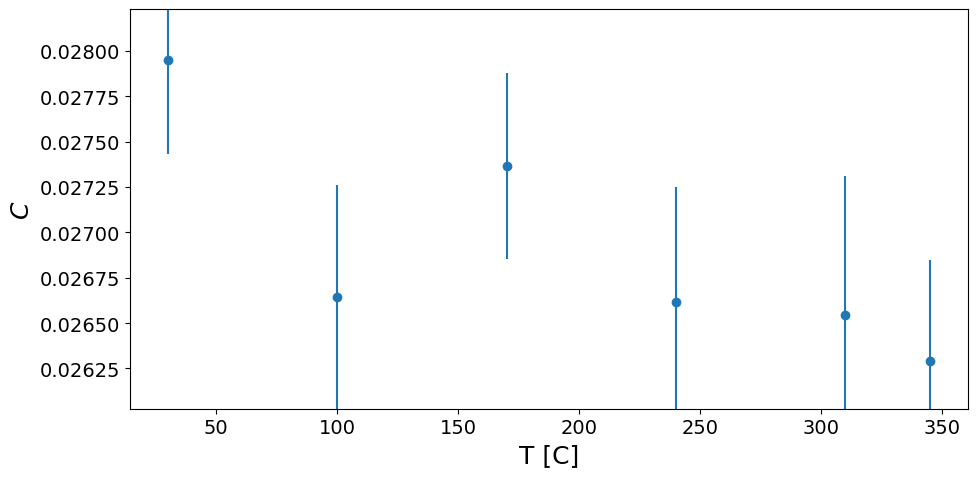

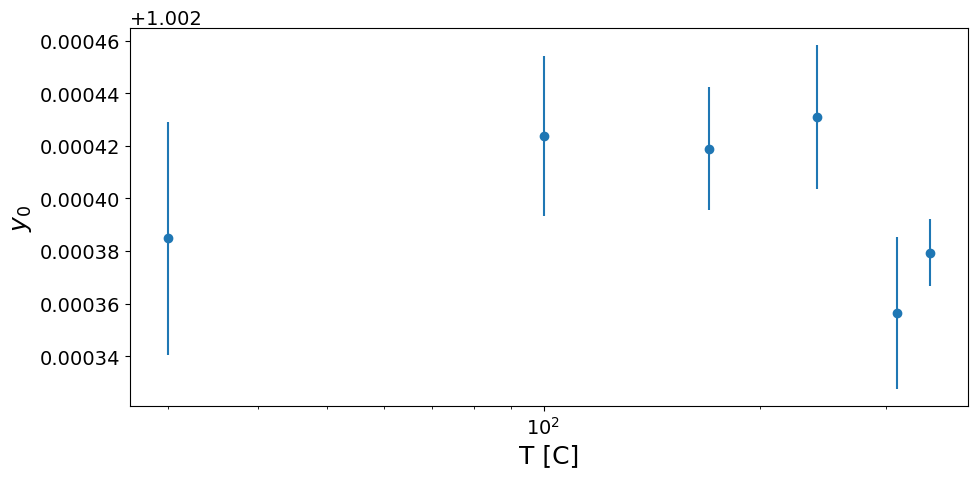

In [19]:
T_6 = [30, 100, 170, 240, 310, 380, 450, 520, 590, 660, 730]
tau_6 = [5.3, 4.94, 4.41, 3.79, 3.19, 2.18, 1.47, 1.21, 0.59, 0.28, 0.059]
# tau
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(df['T'], df['tau'], yerr=df['dtau'], fmt='o')
ax.plot(T_6, tau_6, 'ro')
##plt.yscale('log')
plt.xlabel('T [C]')
plt.ylabel(r'$\tau$ [s]')
plt.tight_layout(), plt.show();

# beta
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(df['T'], df['beta'], yerr=df['dbeta'], fmt='o')
#plt.xscale('log')
plt.xlabel('T [C]')
plt.ylabel(r'$\beta$')
plt.tight_layout(), plt.show();

# C
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(df['T'], df['c'], yerr=df['dc'], fmt='o')
#plt.yscale('log')
plt.xlabel('T [C]')
plt.ylabel(r'$C$')
plt.ylim(0.99*df['c'].min(), 1.01*df['c'].max())
plt.tight_layout(), plt.show();

# y0
fig, ax = plt.subplots(figsize=(10, 5))

ax.errorbar(df['T'], df['y0'], yerr=df['dy0'], fmt='o')
plt.xscale('log')
plt.xlabel('T [C]')
plt.ylabel(r'$y_0$')
plt.tight_layout(), plt.show();

